# [9660] Naive Bayes 2
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Titanic.csv

Titanic passenger data
* PassengerId - passenger ID
* Survived - target variable (0 = No; 1 = Yes)
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - name
* Sex - gender
* Age - age
* SibSp - # of siblings/spouses aboard
* Parch - # of parents/children aboard
* Ticket - ticket #
* Fare - passenger fare
* Cabin - cabin #
* Embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/20/24 13:38:29


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Load data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Titanic.csv')

### Examine data

In [4]:
df.shape

(891, 12)

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.10,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.50,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.15,NaN,Q
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.10,C123,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.05,NaN,S


In [6]:
# Display class distribution
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


### Prepare data for model training

#### Drop variables

In [7]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.shape

(891, 8)

In [8]:
# Check missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


#### Handle missing values

In [9]:
df.groupby('Survived')['Age'].transform('mean')

,Age
0,30.626179
1,28.343690
2,28.343690
3,28.343690
4,30.626179
...,...
886,30.626179
887,28.343690
888,30.626179
889,28.343690


In [10]:
# Calculate the average (mean) Age for each class and replace missing Age values
df['Age'] = df['Age'].fillna(df.groupby('Survived')['Age'].transform('mean'))

In [11]:
# Calculate the most frequent (mode) Embarked for each class
mode_embarked = df.groupby('Survived')['Embarked'].transform(lambda x: x.mode()[0])
mode_embarked

,Embarked
0,S
1,S
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,S


In [12]:
# Replace missing Embarked values with the most frequent (mode) Embarked value for each class
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [13]:
# Re-check missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Perform one-hot encoding on the 'Sex' and 'Embarked' columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], dtype=int)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
# Separate dependent and independent variables
#  Dependent variable (target): Survived
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [20]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)

### Train Gaussian Naive Bayes classifier

In [21]:
model = GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [22]:
model.fit(X_train, y_train)

GaussianNB()

In [23]:
print(f'# features observed during fit: {model.n_features_in_}\n')
print(f'features observed during fit: \n{model.feature_names_in_}\n')
print(f'class labels observed during fit: {model.classes_}\n')
print(f'# training samples observed in each class: {model.class_count_}\n')
print(f'probability of each class: {model.class_prior_}\n')
print(f'variance of each feature per class: \n{model.var_}\n')
print(f'mean of each feature per class: \n{model.theta_}\n')

# features observed during fit: 10

features observed during fit: 
['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male'
 'Embarked_C' 'Embarked_Q' 'Embarked_S']

class labels observed during fit: [0 1]

# training samples observed in each class: [384. 239.]

probability of each class: [0.61637239 0.38362761]

variance of each feature per class: 
[[5.24518065e-01 1.51726082e+02 1.21777571e+00 7.24279350e-01
  7.63319719e+02 1.20851887e-01 1.20851887e-01 1.24568250e-01
  7.20237618e-02 1.73803276e-01]
 [7.52019924e-01 1.93776433e+02 4.63894716e-01 6.59829661e-01
  4.24665021e+03 2.16875231e-01 2.16875231e-01 2.03570142e-01
  8.69755447e-02 2.35782463e-01]]

mean of each feature per class: 
[[ 2.5390625  31.19232139  0.46875     0.30989583 20.35515234  0.140625
   0.859375    0.14583333  0.078125    0.77604167]
 [ 1.9665272  28.17682744  0.43933054  0.48535565 47.77458326  0.68200837
   0.31799163  0.28451883  0.09623431  0.61924686]]



In [24]:
y_pred = model.predict(X_test)

### Evaluate Gaussian Naive Bayes model performance

In [25]:
print(f'Accuracy = {round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy = 80.6%


In [26]:
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       165
           1       0.75      0.74      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



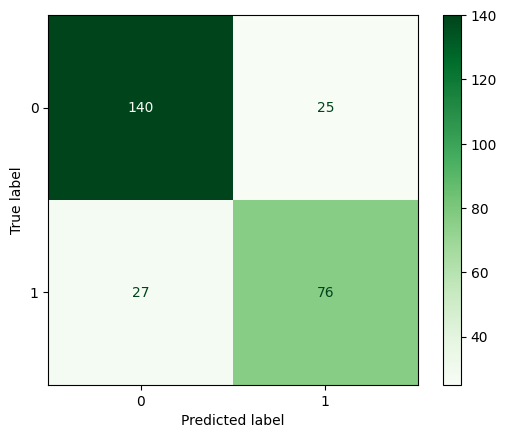

In [27]:
# Display confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()